<a href="https://colab.research.google.com/github/jgmzur29/Google-clone/blob/main/pruebaIngreso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODULOS DE TRABAJO

Agregamos los modulos correspondientes a usar en este proyecto


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np




# Lectura e importacion de los datos

definimos la ruta de nuestro archivo. Por cuestiones de practicidad decidi dejar el archivo de lectura local

In [8]:
archivoLocal="/content/datasetprueba.csv"


In [9]:
df = pd.read_csv(archivoLocal)
df

,_id,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,1,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,3,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,4,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,5,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,900084526,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,53940,900089213,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,53941,900095322,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,53942,900099922,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


#  1. Cuándo es más común tener un accidente? (fin de semana o entre semana)


In [10]:
weekday_accidents = df[df['Weekend?'].isin(['Weekday'])]
weekend_accidents = df[df['Weekend?'].isin(['Weekend'])]

if len(weekday_accidents) > len(weekend_accidents):
    print(f"Es más común accidentarse  entre semana, con un total de {len(weekday_accidents)} incidentes. Esto significa que hay un total de {(len(weekday_accidents)-len(weekend_accidents))} incidentes de mas sobre los sucedidos en fin de semana")
elif len(weekday_accidents) < len(weekend_accidents):
    print(f"Es más común accidentarse durante el fin de semana con un total de {len(weekend_accidents)} incidentes. Con un total de {(len(weekend_accidents)-len(weekday_accidents))} de mas incidentes sobre los sucedidos entre semana")
else:
    print("El número de accidentes es igual durante la semana y el fin de semana.")

Es más común accidentarse  entre semana, con un total de 40604 incidentes. Esto significa que hay un total de 27333 incidentes de mas sobre los sucedidos en fin de semana


# 2. ¿Cuáles son las peores horas para salir?

In [11]:
df['Hour']=df['Hour']/100

esta transformacion inicial, se hace por simplisidad ya que inicialmente el formato de las horas se presenta en numero enteros, 700, 800 etc.




In [67]:
HoraMasFrecuente = df['Hour'].value_counts().idxmax()
print(f"El mayor numero de incidentes sucede a las {(int(HoraMasFrecuente))} horas por tanto es la peor hora para salir")

El mayor numero de incidentes sucede a las 17 horas por tanto es la peor hora para salir


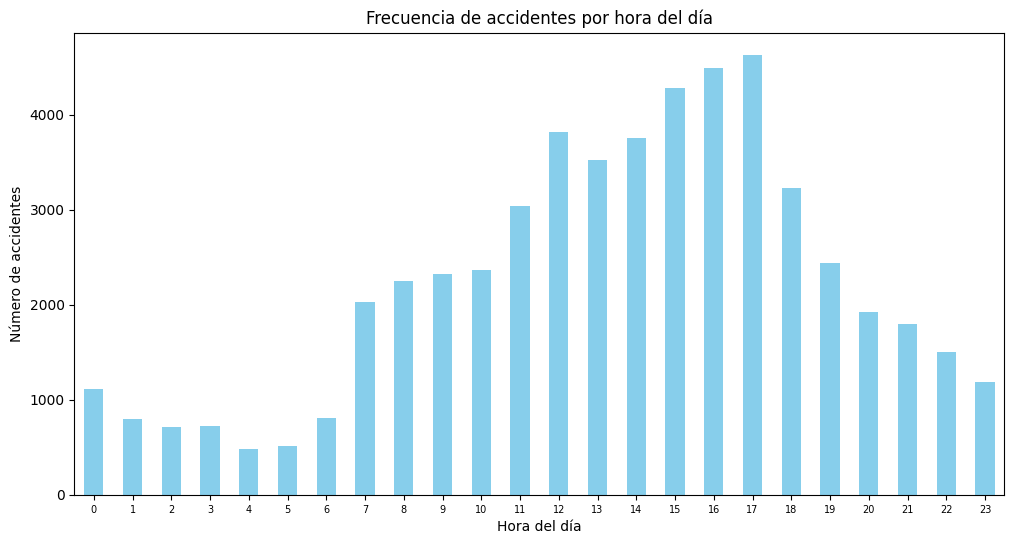

In [13]:
plt.figure(figsize=(12, 6))
ax=df['Hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Número de accidentes')
plt.title('Frecuencia de accidentes por hora del día')
ax.set_xticklabels([int(label) for label in ax.get_xticks()], rotation=0, ha='center', fontsize=7)
plt.show()

In [71]:
Peoreshras = df['Hour'].value_counts().head(5)
print("Las 5 peores horas en términos de incidentes son:")
for hora, count in PeoresHoras.iteritems():
    print(f"A las {int(hora)} horas con {int(count)} incidentes")

Las 5 peores horas en términos de incidentes son:
A las 17 horas con 4631 incidentes
A las 16 horas con 4488 incidentes
A las 15 horas con 4283 incidentes
A las 12 horas con 3819 incidentes
A las 14 horas con 3750 incidentes


<ipython-input-71-e04f547dc0a6>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for hora, count in PeoresHoras.iteritems():


# 3. ¿Cuántos accidentes ocurrieron en total? ¿Cuántos en 2010?


In [14]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

In [15]:
totalAccidentes = df['Master Record Number'].nunique()
print(f'El total de accidentes es de {totalAccidentes}')
accidentes_2010 = len(df[df['Year']== 2010])
print(f'El total de accidentes en el año 2010 fue de {accidentes_2010}')

El total de accidentes es de 53943
El total de accidentes en el año 2010 fue de 4060


# 4. ¿Qué tipos de accidentes existen?


In [16]:
tipos_accidentes = df['Collision Type'].dropna().unique()
print(f"Tipos de accidentes que existen son {tipos_accidentes}")

Tipos de accidentes que existen son ['2-Car' '1-Car' '3+ Cars' 'Pedestrian' 'Cyclist' 'Bus' 'Moped/Motorcycle']


# 5. ¿En qué ubicación hay 20% más accidentes año contra año?


In [17]:
CambioUbicacion = df.groupby(['Year', 'Reported_Location']).size().unstack().pct_change().mean()
Ubicacion = CambioUbicacion.idxmax()
print(f"La ubicación con un 20% más de accidentes año contra año es {Ubicacion}")

La ubicación con un 20% más de accidentes año contra año es EAST 3RD


# 6. ¿En qué ubicación es mejor ser peatón

Esta pregunta puede presentar dos posibles respuestas, ya que no es del todo clara. En este caso se seleccionaron dos escenarios. El primero donde hay mayor accidentalidad y no hay peatones involucrados en ninguno de los casos. El segundo, es donde la accidentalidad es casi nula y ademas, no hay peatones involucrados.

In [18]:
masAccidentes=df['Reported_Location'].value_counts()
sinPeatones = masAccidentes[masAccidentes.index.isin(df[df['Collision Type'] == 'Pedestrian']['Reported_Location'].unique()) == False].idxmax()

print(f"la mejor ubicacion para ser peaton es '{sinPeatones}' ya que hay una alta accidentalidad pero no hay peatones involucrados")


la mejor ubicacion para ser peaton es 'SR37N & VERNAL' ya que hay una alta accidentalidad pero no hay peatones involucrados


In [19]:
menosAccidentes=df['Reported_Location'].value_counts()
sinPeatones2 = menosAccidentes[menosAccidentes.index.isin(df[df['Collision Type'] == 'Pedestrian']['Reported_Location'].unique()) == False].idxmin()

print(f"la mejor ubicacion para ser peaton es '{sinPeatones2}' ya que su accidentalidad es casi nula y no hay peatones involucrados")

la mejor ubicacion para ser peaton es 'PAPER BIRCH CT & WOODSIDE' ya que su accidentalidad es casi nula y no hay peatones involucrados


# 7. ¿Cuáles factores han disminuido?

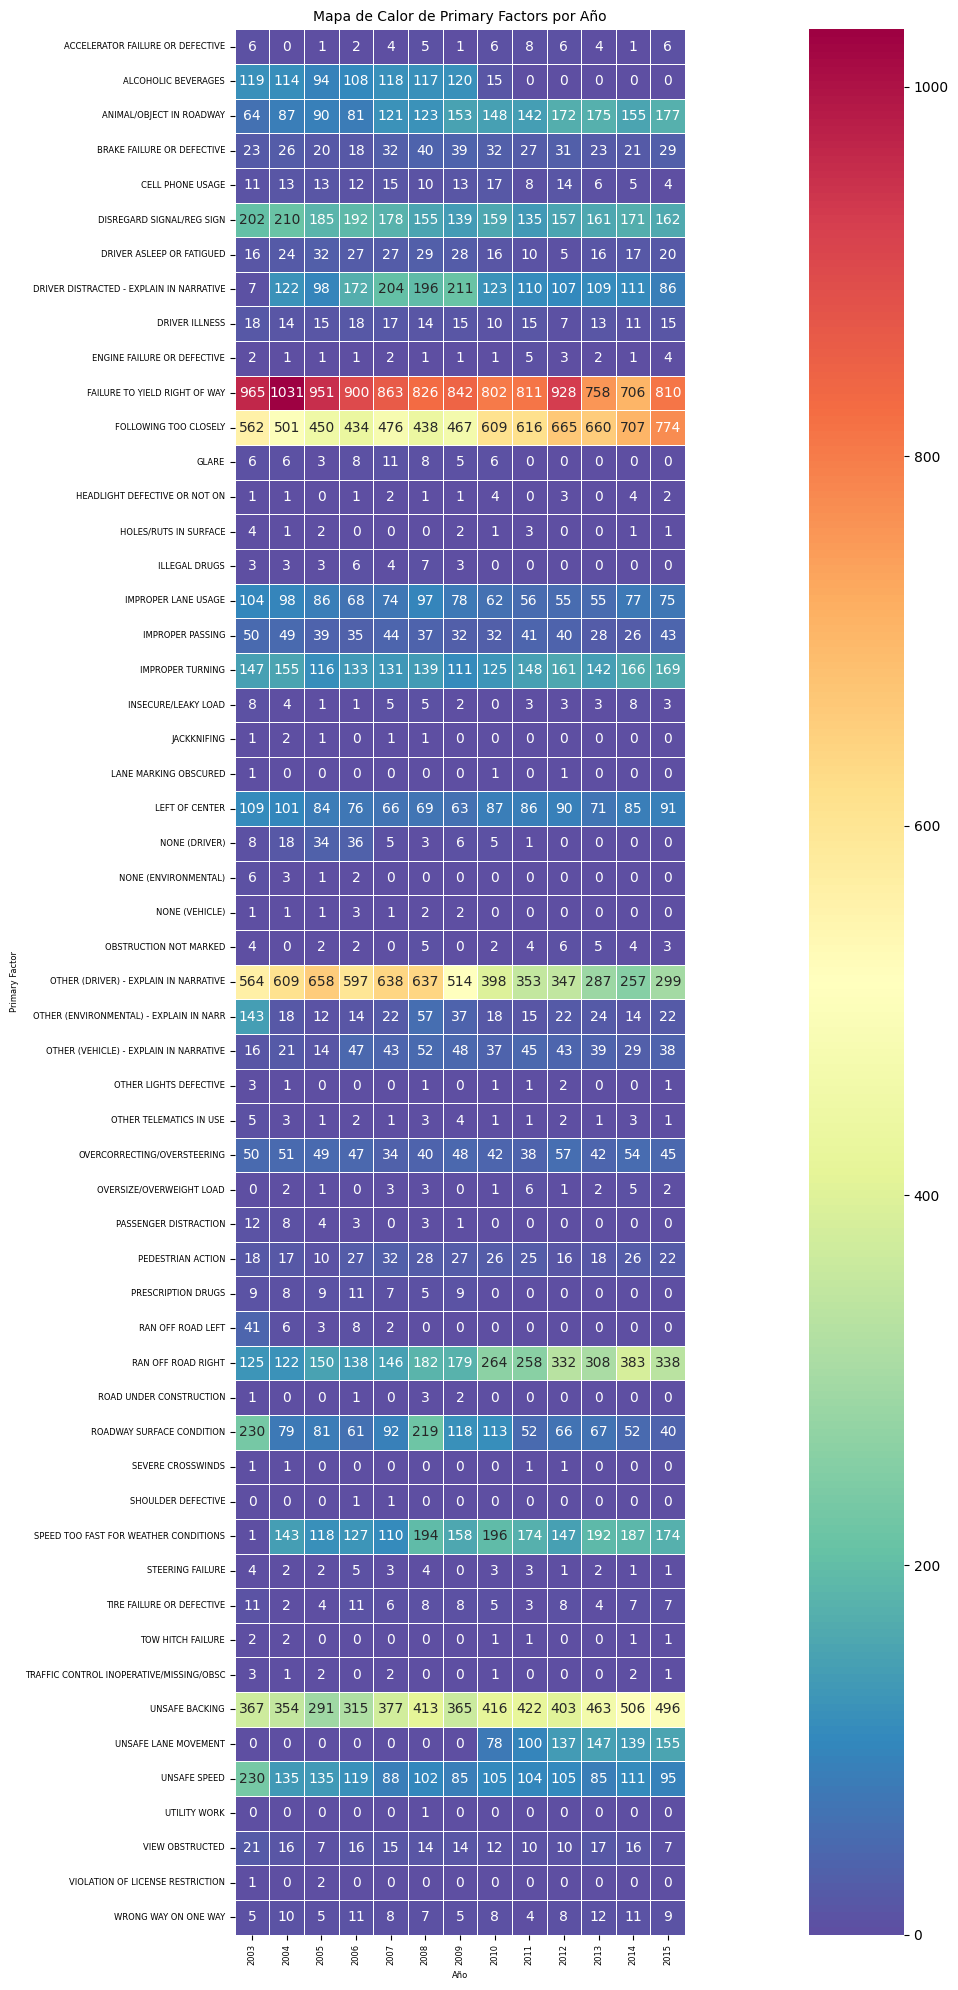

In [44]:
# 2. Crear una tabla de contingencia para contar la frecuencia de accidentes por "Primary Factor" y año
factors_by_year = pd.crosstab(df['Primary Factor'], df['Year'])

# 3. Crear un mapa de calor con personalización
plt.figure(figsize=(25, 20))
cmap = sns.color_palette("Spectral_r", as_cmap=True)
sns.heatmap(factors_by_year, annot=True, fmt='d', cmap=cmap, cbar=True, linewidths=0.5, square=True)

# 4. Personalizar el mapa de calor
plt.title('Mapa de Calor de Primary Factors por Año', fontsize=10)
plt.xlabel('Año', fontsize=6)
plt.ylabel('Primary Factor', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

# 5. Mostrar el mapa de calor
plt.tight_layout()
plt.show()


se realiza este mapa de calor para tener un acercamiento inicial a los datos y poder evidenciar de manera grafica las variaciones año tras año, el incoveniente es que algunos factores de accidentalidad son muy chicos en su valor inicial o son 0 y no permite un analisis certero de la disminucion.

In [83]:
factoresPorAnyo = df.groupby(['Year', 'Primary Factor']).size()
cambioPorcentual = factoresPorAnyo.pct_change()

variacionTotal = cambioPorcentual.groupby(level=1).sum()
factoresNegativos = variacionTotal[variacionTotal < 0]
factoresOrdenados = factoresNegativos.sort_values()

print(f"factores que disminuyeron en el total de los años son: {factoresOrdenados}")


factores que disminuyeron en el total de los años son: Primary Factor
OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR    -12.116464
INSECURE/LEAKY LOAD                        -11.685500
DRIVER ASLEEP OR FATIGUED                  -11.423886
ENGINE FAILURE OR DEFECTIVE                -11.066169
BRAKE FAILURE OR DEFECTIVE                 -10.035418
OVERSIZE/OVERWEIGHT LOAD                    -9.393237
DRIVER ILLNESS                              -9.154384
HEADLIGHT DEFECTIVE OR NOT ON               -8.355429
GLARE                                       -7.890315
STEERING FAILURE                            -7.820942
CELL PHONE USAGE                            -7.736934
NONE (DRIVER)                               -7.586368
OTHER LIGHTS DEFECTIVE                      -6.623574
IMPROPER PASSING                            -6.269111
UNSAFE SPEED                                -5.294701
ACCELERATOR FAILURE OR DEFECTIVE            -4.539719
UNSAFE LANE MOVEMENT                        -4.330885
FOLLOWING TO

# Algunos datos extras o interesantes


### Mediante un analisis exploratorio de los datos se identifico que la base presenta algunos problemas de consistencia.  

In [73]:
latLong = df['Latitude'].astype(str) + ', ' + df['Longitude'].astype(str)
latLong = latLong.dropna()
latLong = latLong.unique()
print(f"Existen {len(latLong)} ubicaciones de Latitud+longitud diferentes")


Existen 19399 ubicaciones de Latitud+longitud diferentes


In [75]:
ubicaciones=df['Reported_Location']
ubicaciones=ubicaciones.unique()
print(f"Existen {len(ubicaciones)} ubicaciones unicas")

Existen 19365 ubicaciones unicas


La relacion entre ubicaciones unicas y la concatenacion de latitudes y longitudes, no guarda sentido ya que estas deberian ser exactamente las mismas.

In [25]:


# Seleccionar las columnas de localización, latitud y longitud
data = df[['Reported_Location', 'Latitude', 'Longitude']]

# 3. Agrupar por localización y verificar si las latitudes y longitudes son distintas
localizaciones_distintas = data.groupby('Reported_Location').apply(lambda group: (group['Latitude'].nunique() > 1) or (group['Longitude'].nunique() > 1))

# 4. Filtrar las localizaciones con latitudes o longitudes distintas
localizaciones_con_distintas_coordenadas = localizaciones_distintas[localizaciones_distintas]

# 5. Mostrar las localizaciones con latitudes o longitudes distintas
print("Localizaciones con latitudes o longitudes distintas:")
print(localizaciones_con_distintas_coordenadas.index)


Localizaciones con latitudes o longitudes distintas:
Index(['10 & SR46E', '1001 E 3RD (DOCK) ST & HAWTHORNE', '10TH',
       '10TH & 10TH ST', '10TH & 45 46', '10TH & 45 46 BYP', '10TH & ADAMS ST',
       '10TH & CAMPBELL', '10TH & CAMPBELL DR', '10TH & CAMPBELL ST',
       ...
       'WOODCREST', 'WOODCREST DR', 'WOODHAVEN DR & WOODMERE', 'WOODLAWN',
       'WOODLAWN AVE', 'WOODSCREST', 'WOODSCREST DR', 'WOODYARD RD',
       'YOST AVE', 'ZIKES RD'],
      dtype='object', name='Reported_Location', length=4495)


cuando agrupamos y filtramos por localización y verificamos si las latitudes y longitudes son distintas evidenciamos que existen multiples ubicaciones que en esencia aparentan ser el mismo lugar y por tanto los datos podrian no ser precisos. Evidencia que muchos datos no estan consignados de manera precisa, pues situa calles enteras ('10TH' por ejemplo) como el lugar de incidente y no el punto exacto.

### Proporcion de accidentes vs el total de los incidentes

In [89]:

Fatales = len(df[df['Injury Type'] == 'Fatal']) / len(df)
print(f"Proporción de accidentes con lesiones fatales {round(Fatales,5)}")
incapacitantes = len(df[df['Injury Type'] == 'Incapacitating']) / len(df)
print(f"Proporción de accidentes con lesiones graves {round(incapacitantes,5)}")
leves = len(df[df['Injury Type'] == 'Non-incapacitating']) / len(df)
print(f"Proporción de accidentes con lesiones leves {round(leves,5)}")
sinLesiones = len(df[df['Injury Type'] == 'No injury/unknown']) / len(df)
print(f"Proporción de accidentes sin lesiones {round(sinLesiones,5)}")

Proporción de accidentes con lesiones fatales 0.00213
Proporción de accidentes con lesiones graves 0.02019
Proporción de accidentes con lesiones leves 0.20644
Proporción de accidentes sin lesiones 0.77124


### Otras estadisticas

In [98]:
import calendar

accidentesPorMes = df['Month'].value_counts()
mesComunMas = accidentesPorMes.idxmax()
totalAccidentes= accidentesPorMes.max()
nombreMes = calendar.month_name[int(mesComunMas)]
print(f"El mes con más accidentes es {nombreMes} con un total de {totalAccidentes} accidentes.")

mesComunMenos = accidentesPorMes.idxmin()
totalAccidentes= accidentesPorMes.min()
nombreMes = calendar.month_name[int(mesComunMenos)]
print(f"El mes con menos accidentes es {nombreMes} con un total de {totalAccidentes} accidentes.")

accidentesPorAnyo = df['Year'].value_counts()
anyoMasAccidentes = accidentesPorAnyo.idxmax()
totalAccidentesMas = accidentesPorAnyo.max()
print(f"El año con más accidentes es {anyoMasAccidentes} con un total de {totalAccidentesMas} accidentes.")

anyoMenosAccidentes = accidentesPorAnyo.idxmin()
totalAccidentesMenos = accidentesPorAnyo.min()
print(f"El año con menos accidentes es {anyoMenosAccidentes} con un total de {totalAccidentesMenos} accidentes.")

promAccidentes = accidentesPorAnyo.mean()
print(f"El promedio de accidentes a lo largo de todos los años es aproximadamente {round(promAccidentes)} accidentes por año.")

calleConMasAccidentes = df['Reported_Location'].value_counts().idxmax()
cantidadAccidentesCalle = df['Reported_Location'].value_counts().max()
print(f"La calle con más accidentes es '{calleConMasAccidentes}' con un total de {cantidadAccidentesCalle} incidentes.")

causaMasRepetida = df['Primary Factor'].value_counts().idxmax()
totalAccidentesCausaMas = df['Primary Factor'].value_counts().max()
causaMenosRepetida = df['Primary Factor'].value_counts().idxmin()
totalAccidentesCausaMenos= df['Primary Factor'].value_counts().min()
print(f"La causa más repetida de accidentes es '{causaMasRepetida}' con un total de {totalAccidentesCausaMas} accidentes.")
print(f"La causa menos repetida de accidentes es '{causaMenosRepetida}' con un total de {totalAccidentesCausaMenos} accidentes.")

El mes con más accidentes es October con un total de 5581 accidentes.
El mes con menos accidentes es June con un total de 3752 accidentes.
El año con más accidentes es 2003 con un total de 4625 accidentes.
El año con menos accidentes es 2011 con un total de 3914 accidentes.
El promedio de accidentes a lo largo de todos los años es aproximadamente 4149 accidentes por año.
La calle con más accidentes es 'E 3RD ST' con un total de 375 incidentes.
La causa más repetida de accidentes es 'FAILURE TO YIELD RIGHT OF WAY' con un total de 11193 accidentes.
La causa menos repetida de accidentes es 'UTILITY WORK' con un total de 1 accidentes.
